In [1]:
!pip install python-binance pandas mplfinance

   ---------------------------------------- 0.0/69.9 kB ? eta -:--:--
   ----------------------- ---------------- 41.0/69.9 kB 960.0 kB/s eta 0:00:01
   ----------------------------------- ---- 61.4/69.9 kB 648.1 kB/s eta 0:00:01
   ---------------------------------------- 69.9/69.9 kB 542.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/75.0 kB ? eta -:--:--
   ---------------------------------------- 75.0/75.0 kB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/295.0 kB ? eta -:--:--
   --------------- ------------------------ 112.6/295.0 kB 3.3 MB/s eta 0:00:01
   ---------------------- ----------------- 163.8/295.0 kB 1.6 MB/s eta 0:00:01
   -------------------------------------- - 286.7/295.0 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 295.0/295.0 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.8 MB ? eta -:--:--
   - --------

In [5]:
from binance import Client,ThreadedDepthCacheManager,ThreadedWebsocketManager
import pandas as pd 

In [6]:
# Authenticate
apikey='APIKEY'
secret='SECRET'
client=Client(apikey,secret)
client

In [7]:
tickers=client.get_all_tickers()
tickers

[{'symbol': 'ETHBTC', 'price': '0.05304000'},
 {'symbol': 'LTCBTC', 'price': '0.00128700'},
 {'symbol': 'BNBBTC', 'price': '0.00871800'},
 {'symbol': 'NEOBTC', 'price': '0.00022650'},
 {'symbol': 'QTUMETH', 'price': '0.00121900'},
 {'symbol': 'EOSETH', 'price': '0.00028820'},
 {'symbol': 'SNTETH', 'price': '0.00001284'},
 {'symbol': 'BNTETH', 'price': '0.00023450'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00009760'},
 {'symbol': 'BNBETH', 'price': '0.16440000'},
 {'symbol': 'BTCUSDT', 'price': '64332.29000000'},
 {'symbol': 'ETHUSDT', 'price': '3412.00000000'},
 {'symbol': 'HSRBTC', 'price': '0.00041400'},
 {'symbol': 'OAXETH', 'price': '0.00017780'},
 {'symbol': 'DNTETH', 'price': '0.00002801'},
 {'symbol': 'MCOETH', 'price': '0.00577200'},
 {'symbol': 'ICNETH', 'price': '0.00166300'},
 {'symbol': 'MCOBTC', 'price': '0.00021140'},
 {'symbol': 'WTCBTC', 'price': '0.00000024'},
 {'symbol': 'WTCETH', 'price': '0.00023700'},
 {'symbol': 'LRCBTC', 'p

In [8]:
tickers[1]['price']

'0.00128700'

In [9]:
ticker_df=pd.DataFrame(tickers)

In [10]:
ticker_df.head()

,symbol,price
0,ETHBTC,0.05304000
1,LTCBTC,0.00128700
2,BNBBTC,0.00871800
3,NEOBTC,0.00022650
4,QTUMETH,0.00121900


In [11]:
ticker_df.tail()

,symbol,price
2548,ARKMFDUSD,2.60030000
2549,CRVTRY,21.71000000
2550,FETBRL,12.68000000
2551,RAYFDUSD,1.98270000
2552,RNDREUR,10.06100000


In [12]:
ticker_df.set_index('symbol',inplace=True)

In [13]:
float(ticker_df.loc['ETHBTC']['price'])

0.05304

In [14]:
# Create an instance of the Client class
client_instance = Client()

# Call the get_order_book method on the instance
depth = client_instance.get_order_book(symbol='BTCUSDT')


In [15]:
depth

{'lastUpdateId': 44829860280,
 'bids': [['64316.01000000', '0.20000000'],
  ['64316.00000000', '0.07465000'],
  ['64315.65000000', '0.00016000'],
  ['64315.59000000', '0.03345000'],
  ['64314.65000000', '0.00035000'],
  ['64314.01000000', '0.04476000'],
  ['64314.00000000', '0.07450000'],
  ['64313.82000000', '0.00018000'],
  ['64312.31000000', '0.00077000'],
  ['64312.00000000', '0.07450000'],
  ['64311.01000000', '0.00579000'],
  ['64310.01000000', '0.05640000'],
  ['64310.00000000', '0.09388000'],
  ['64309.95000000', '0.00017000'],
  ['64309.56000000', '0.06006000'],
  ['64309.55000000', '0.10000000'],
  ['64307.82000000', '0.00008000'],
  ['64307.52000000', '0.00077000'],
  ['64307.39000000', '0.00019000'],
  ['64307.12000000', '0.06850000'],
  ['64304.73000000', '0.00036000'],
  ['64304.55000000', '0.00008000'],
  ['64304.52000000', '0.24167000'],
  ['64304.18000000', '0.40266000'],
  ['64302.72000000', '0.00015000'],
  ['64302.69000000', '0.26618000'],
  ['64302.68000000', '0.44

In [16]:
depth_df = pd.DataFrame(depth['asks'])
depth_df.columns = ['Price','Volume']
depth_df.head()

,Price,Volume
0,64316.02000000,4.12155000
1,64317.89000000,0.20000000
2,64318.00000000,0.12086000
3,64318.01000000,0.20000000
4,64318.08000000,0.31139000


In [17]:
depth_df.dtypes


Price     object
Volume    object
dtype: object

In [18]:
client.get_historical_klines?

Signature:
client.get_historical_klines(
    symbol,
    interval,
    start_str=None,
    end_str=None,
    limit=1000,
    klines_type: binance.enums.HistoricalKlinesType = <HistoricalKlinesType.SPOT: 1>,
)
Docstring:
Get Historical Klines from Binance

:param symbol: Name of symbol pair e.g. BNBBTC
:type symbol: str
:param interval: Binance Kline interval
:type interval: str
:param start_str: optional - start date string in UTC format or timestamp in milliseconds
:type start_str: str|int
:param end_str: optional - end date string in UTC format or timestamp in milliseconds (default will fetch everything up to now)
:type end_str: str|int
:param limit: Default 1000; max 1000.
:type limit: int
:param klines_type: Historical klines type: SPOT or FUTURES
:type klines_type: HistoricalKlinesType

:return: list of OHLCV values (Open time, Open, High, Low, Close, Volume, Close time, Quote asset volume, Number of trades, Taker buy base asset volume, Taker buy quote asset volume, Ignore)
File: 

In [52]:
historical=client.get_historical_klines('ETHBTC',Client.KLINE_INTERVAL_1DAY,'1 Jan 2023')

In [53]:
historical

[[1672531200000,
  '0.07229900',
  '0.07250000',
  '0.07211000',
  '0.07223800',
  '29425.92980000',
  1672617599999,
  '2127.63972082',
  54865,
  '15202.58740000',
  '1099.25827475',
  '0'],
 [1672617600000,
  '0.07223800',
  '0.07301800',
  '0.07207100',
  '0.07281400',
  '50073.41630000',
  1672703999999,
  '3635.94441336',
  84917,
  '25144.30610000',
  '1826.19106391',
  '0'],
 [1672704000000,
  '0.07281400',
  '0.07285700',
  '0.07244900',
  '0.07284000',
  '56344.91520000',
  1672790399999,
  '4096.75989997',
  90775,
  '28068.00790000',
  '2040.75174616',
  '0'],
 [1672790400000,
  '0.07284000',
  '0.07506900',
  '0.07281900',
  '0.07458100',
  '99025.83950000',
  1672876799999,
  '7349.11547623',
  158770,
  '50938.97370000',
  '3778.90818578',
  '0'],
 [1672876800000,
  '0.07458100',
  '0.07464300',
  '0.07408200',
  '0.07433600',
  '56893.23050000',
  1672963199999,
  '4230.43321455',
  91532,
  '27793.86310000',
  '2066.50056148',
  '0'],
 [1672963200000,
  '0.07433600',
 

In [54]:
hist_df = pd.DataFrame(historical)

In [55]:
hist_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1672531200000,0.07229900,0.07250000,0.07211000,0.07223800,29425.92980000,1672617599999,2127.63972082,54865,15202.58740000,1099.25827475,0
1,1672617600000,0.07223800,0.07301800,0.07207100,0.07281400,50073.41630000,1672703999999,3635.94441336,84917,25144.30610000,1826.19106391,0
2,1672704000000,0.07281400,0.07285700,0.07244900,0.07284000,56344.91520000,1672790399999,4096.75989997,90775,28068.00790000,2040.75174616,0
3,1672790400000,0.07284000,0.07506900,0.07281900,0.07458100,99025.83950000,1672876799999,7349.11547623,158770,50938.97370000,3778.90818578,0
4,1672876800000,0.07458100,0.07464300,0.07408200,0.07433600,56893.23050000,1672963199999,4230.43321455,91532,27793.86310000,2066.50056148,0


In [56]:
hist_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 
                    'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']
"""The line hist_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore'] renames the columns of the DataFrame hist_df to make them more descriptive and meaningful. Here's what each column represents:

    'Open Time': The starting time of the candlestick period.
    'Open': The opening price of the asset at the beginning of the candlestick period.
    'High': The highest price of the asset during the candlestick period.
    'Low': The lowest price of the asset during the candlestick period.
    'Close': The closing price of the asset at the end of the candlestick period.
    'Volume': The total trading volume (in terms of the base asset) during the candlestick period.
    'Close Time': The ending time of the candlestick period.
    'Quote Asset Volume': The total trading volume (in terms of the quote asset) during the candlestick period.
    'Number of Trades': The number of trades executed during the candlestick period.
    'TB Base Volume': Total of the base asset volume traded during the candlestick period.
    'TB Quote Volume': Total of the quote asset volume traded during the candlestick period.
    'Ignore': This column may contain data that is not relevant to your analysis and can be ignored."""

"The line hist_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore'] renames the columns of the DataFrame hist_df to make them more descriptive and meaningful. Here's what each column represents:\n\n    'Open Time': The starting time of the candlestick period.\n    'Open': The opening price of the asset at the beginning of the candlestick period.\n    'High': The highest price of the asset during the candlestick period.\n    'Low': The lowest price of the asset during the candlestick period.\n    'Close': The closing price of the asset at the end of the candlestick period.\n    'Volume': The total trading volume (in terms of the base asset) during the candlestick period.\n    'Close Time': The ending time of the candlestick period.\n    'Quote Asset Volume': The total trading volume (in terms of the quote asset) during the candlestick period.\n    'Number of Trades': Th

In [57]:
hist_df

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,1672531200000,0.07229900,0.07250000,0.07211000,0.07223800,29425.92980000,1672617599999,2127.63972082,54865,15202.58740000,1099.25827475,0
1,1672617600000,0.07223800,0.07301800,0.07207100,0.07281400,50073.41630000,1672703999999,3635.94441336,84917,25144.30610000,1826.19106391,0
2,1672704000000,0.07281400,0.07285700,0.07244900,0.07284000,56344.91520000,1672790399999,4096.75989997,90775,28068.00790000,2040.75174616,0
3,1672790400000,0.07284000,0.07506900,0.07281900,0.07458100,99025.83950000,1672876799999,7349.11547623,158770,50938.97370000,3778.90818578,0
4,1672876800000,0.07458100,0.07464300,0.07408200,0.07433600,56893.23050000,1672963199999,4230.43321455,91532,27793.86310000,2066.50056148,0
...,...,...,...,...,...,...,...,...,...,...,...,...
442,1710720000000,0.05329000,0.05334000,0.05180000,0.05207000,45858.70090000,1710806399999,2408.69578736,127454,19956.79820000,1048.38455219,0
443,1710806400000,0.05207000,0.05231000,0.05096000,0.05100000,89317.83950000,1710892799999,4601.03509038,251502,37495.16710000,1933.00412942,0
444,1710892800000,0.05101000,0.05290000,0.05021000,0.05182000,125378.09970000,1710979199999,6453.41616891,342707,56452.63090000,2909.33180957,0
445,1710979200000,0.05182000,0.05350000,0.05168000,0.05333000,59622.52660000,1711065599999,3139.71688193,166954,29788.20960000,1567.27438349,0


In [59]:
hist_df.tail()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
442,1710720000000,0.05329000,0.05334000,0.05180000,0.05207000,45858.70090000,1710806399999,2408.69578736,127454,19956.79820000,1048.38455219,0
443,1710806400000,0.05207000,0.05231000,0.05096000,0.05100000,89317.83950000,1710892799999,4601.03509038,251502,37495.16710000,1933.00412942,0
444,1710892800000,0.05101000,0.05290000,0.05021000,0.05182000,125378.09970000,1710979199999,6453.41616891,342707,56452.63090000,2909.33180957,0
445,1710979200000,0.05182000,0.05350000,0.05168000,0.05333000,59622.52660000,1711065599999,3139.71688193,166954,29788.20960000,1567.27438349,0
446,1711065600000,0.05333000,0.05344000,0.05275000,0.05306000,18961.94680000,1711151999999,1006.41158358,58940,9041.44470000,479.83786932,0


In [60]:
hist_df.shape

(447, 12)

In [61]:
hist_df.dtypes

Open Time              int64
Open                  object
High                  object
Low                   object
Close                 object
Volume                object
Close Time             int64
Quote Asset Volume    object
Number of Trades       int64
TB Base Volume        object
TB Quote Volume       object
Ignore                object
dtype: object

In [62]:
# preprocess Historical data
hist_df['Open Time']=pd.to_datetime(hist_df['Open Time']/1000,unit='s')
hist_df['Close Time']=pd.to_datetime(hist_df['Close Time']/1000,unit='s')

In [63]:
hist_df


,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2023-01-01,0.07229900,0.07250000,0.07211000,0.07223800,29425.92980000,2023-01-01 23:59:59.999000064,2127.63972082,54865,15202.58740000,1099.25827475,0
1,2023-01-02,0.07223800,0.07301800,0.07207100,0.07281400,50073.41630000,2023-01-02 23:59:59.999000064,3635.94441336,84917,25144.30610000,1826.19106391,0
2,2023-01-03,0.07281400,0.07285700,0.07244900,0.07284000,56344.91520000,2023-01-03 23:59:59.999000064,4096.75989997,90775,28068.00790000,2040.75174616,0
3,2023-01-04,0.07284000,0.07506900,0.07281900,0.07458100,99025.83950000,2023-01-04 23:59:59.999000064,7349.11547623,158770,50938.97370000,3778.90818578,0
4,2023-01-05,0.07458100,0.07464300,0.07408200,0.07433600,56893.23050000,2023-01-05 23:59:59.999000064,4230.43321455,91532,27793.86310000,2066.50056148,0
...,...,...,...,...,...,...,...,...,...,...,...,...
442,2024-03-18,0.05329000,0.05334000,0.05180000,0.05207000,45858.70090000,2024-03-18 23:59:59.999000064,2408.69578736,127454,19956.79820000,1048.38455219,0
443,2024-03-19,0.05207000,0.05231000,0.05096000,0.05100000,89317.83950000,2024-03-19 23:59:59.999000064,4601.03509038,251502,37495.16710000,1933.00412942,0
444,2024-03-20,0.05101000,0.05290000,0.05021000,0.05182000,125378.09970000,2024-03-20 23:59:59.999000064,6453.41616891,342707,56452.63090000,2909.33180957,0
445,2024-03-21,0.05182000,0.05350000,0.05168000,0.05333000,59622.52660000,2024-03-21 23:59:59.999000064,3139.71688193,166954,29788.20960000,1567.27438349,0


In [64]:

 hist_df['Open Time']

0     2023-01-01
1     2023-01-02
2     2023-01-03
3     2023-01-04
4     2023-01-05
         ...    
442   2024-03-18
443   2024-03-19
444   2024-03-20
445   2024-03-21
446   2024-03-22
Name: Open Time, Length: 447, dtype: datetime64[ns]

In [65]:
 hist_df['Close Time']

0     2023-01-01 23:59:59.999000064
1     2023-01-02 23:59:59.999000064
2     2023-01-03 23:59:59.999000064
3     2023-01-04 23:59:59.999000064
4     2023-01-05 23:59:59.999000064
                   ...             
442   2024-03-18 23:59:59.999000064
443   2024-03-19 23:59:59.999000064
444   2024-03-20 23:59:59.999000064
445   2024-03-21 23:59:59.999000064
446   2024-03-22 23:59:59.999000064
Name: Close Time, Length: 447, dtype: datetime64[ns]

In [66]:
 hist_df['Open Time']

0     2023-01-01
1     2023-01-02
2     2023-01-03
3     2023-01-04
4     2023-01-05
         ...    
442   2024-03-18
443   2024-03-19
444   2024-03-20
445   2024-03-21
446   2024-03-22
Name: Open Time, Length: 447, dtype: datetime64[ns]

In [67]:
numeric_data=['Open', 'High', 'Low', 'Close', 'Volume','Quote Asset Volume', 'TB Base Volume',
       'TB Quote Volume','Ignore']

In [68]:
len(numeric_data)

9

In [69]:
hist_df[numeric_data]=hist_df[numeric_data].apply(pd.to_numeric,axis=1)

In [70]:
hist_df

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2023-01-01,0.072299,0.072500,0.072110,0.072238,29425.9298,2023-01-01 23:59:59.999000064,2127.639721,54865,15202.5874,1099.258275,0.0
1,2023-01-02,0.072238,0.073018,0.072071,0.072814,50073.4163,2023-01-02 23:59:59.999000064,3635.944413,84917,25144.3061,1826.191064,0.0
2,2023-01-03,0.072814,0.072857,0.072449,0.072840,56344.9152,2023-01-03 23:59:59.999000064,4096.759900,90775,28068.0079,2040.751746,0.0
3,2023-01-04,0.072840,0.075069,0.072819,0.074581,99025.8395,2023-01-04 23:59:59.999000064,7349.115476,158770,50938.9737,3778.908186,0.0
4,2023-01-05,0.074581,0.074643,0.074082,0.074336,56893.2305,2023-01-05 23:59:59.999000064,4230.433215,91532,27793.8631,2066.500561,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
442,2024-03-18,0.053290,0.053340,0.051800,0.052070,45858.7009,2024-03-18 23:59:59.999000064,2408.695787,127454,19956.7982,1048.384552,0.0
443,2024-03-19,0.052070,0.052310,0.050960,0.051000,89317.8395,2024-03-19 23:59:59.999000064,4601.035090,251502,37495.1671,1933.004129,0.0
444,2024-03-20,0.051010,0.052900,0.050210,0.051820,125378.0997,2024-03-20 23:59:59.999000064,6453.416169,342707,56452.6309,2909.331810,0.0
445,2024-03-21,0.051820,0.053500,0.051680,0.053330,59622.5266,2024-03-21 23:59:59.999000064,3139.716882,166954,29788.2096,1567.274383,0.0


In [71]:
hist_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Open Time           447 non-null    datetime64[ns]
 1   Open                447 non-null    float64       
 2   High                447 non-null    float64       
 3   Low                 447 non-null    float64       
 4   Close               447 non-null    float64       
 5   Volume              447 non-null    float64       
 6   Close Time          447 non-null    datetime64[ns]
 7   Quote Asset Volume  447 non-null    float64       
 8   Number of Trades    447 non-null    int64         
 9   TB Base Volume      447 non-null    float64       
 10  TB Quote Volume     447 non-null    float64       
 11  Ignore              447 non-null    float64       
dtypes: datetime64[ns](2), float64(9), int64(1)
memory usage: 42.0 KB


In [72]:
#viz
data=hist_df


In [73]:
import matplotlib.pyplot as plt

In [87]:
plt.figure(figsize=(50,50))


<Figure size 5000x5000 with 0 Axes>

<Figure size 5000x5000 with 0 Axes>

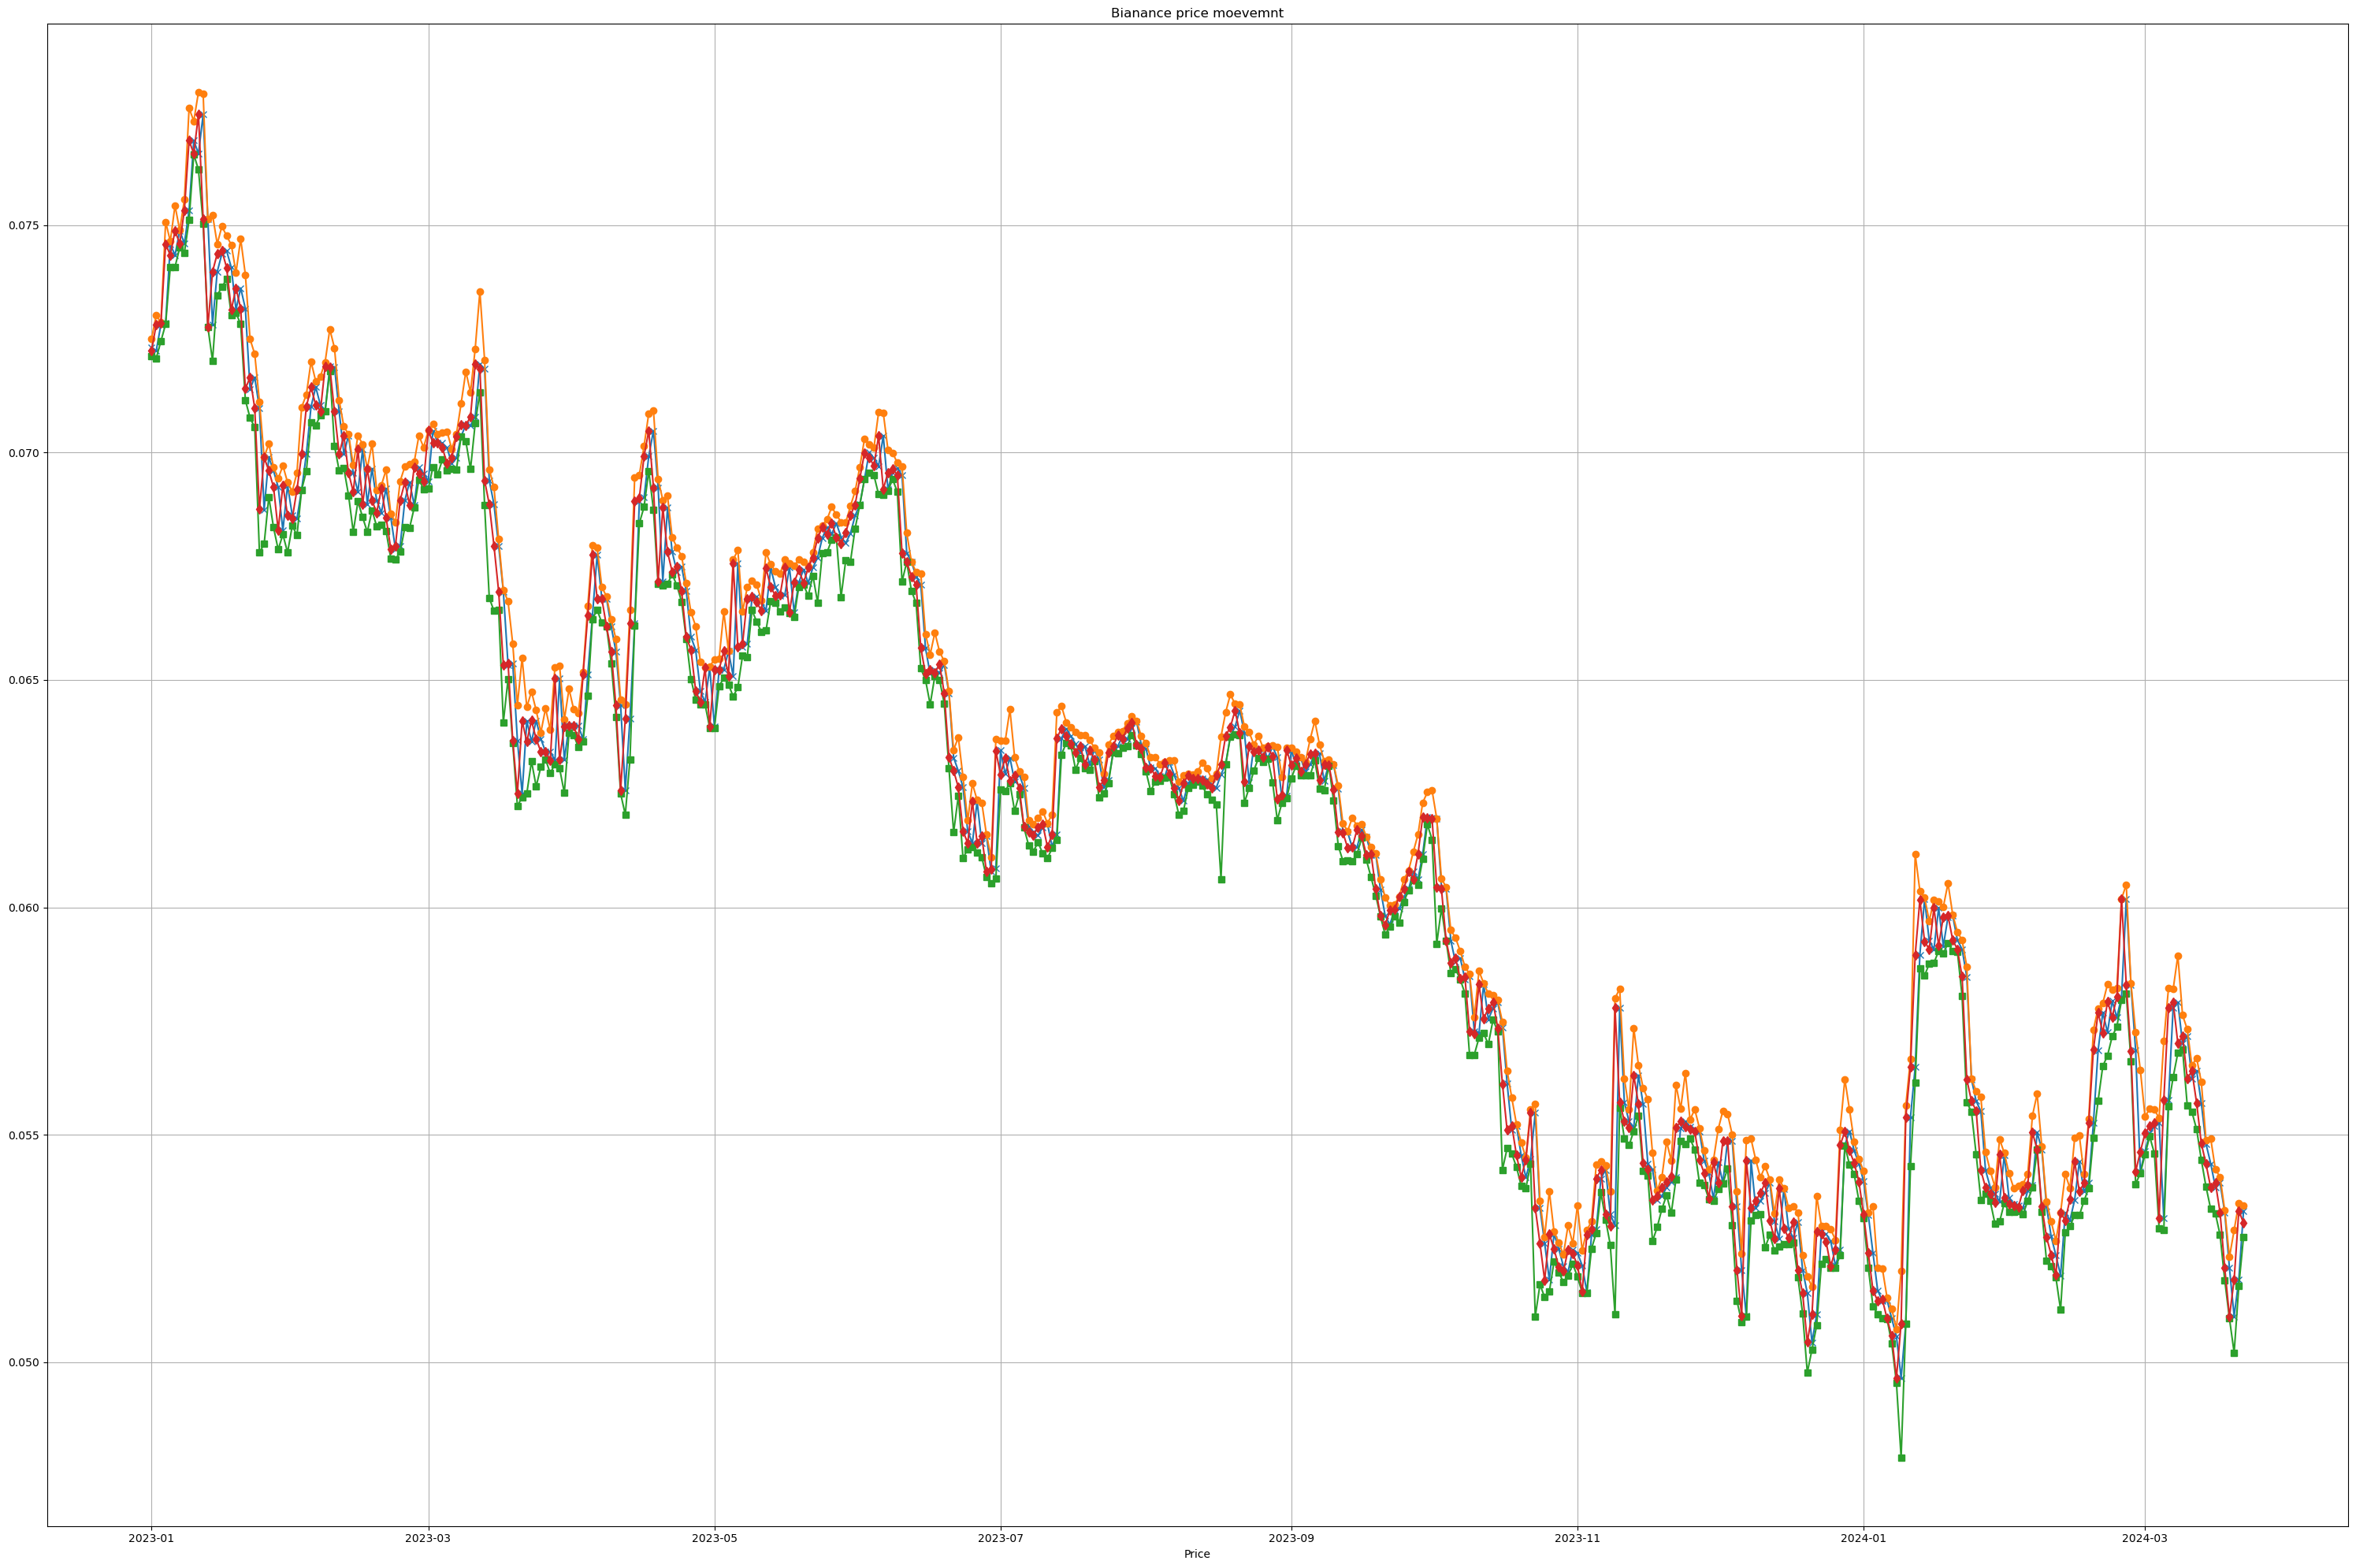

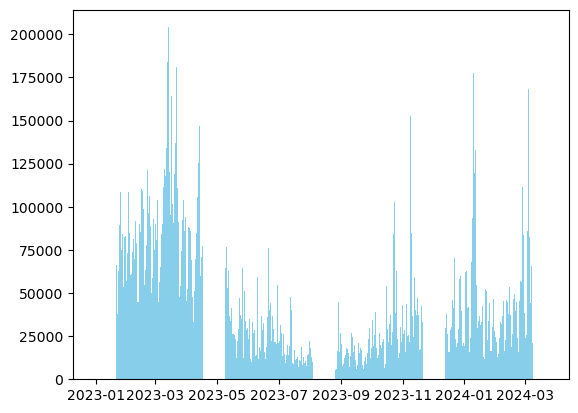

<Figure size 2000x900 with 0 Axes>

In [110]:
plt.figure(figsize=(30,20))
plt.plot(data['Open Time'],data['Open'],label='Open',marker='x')
plt.plot(data['Open Time'],data['High'],label='High',marker='o')
plt.plot(data['Open Time'],data['Low'],label='Low',marker='s')
plt.plot(data['Open Time'],data['Close'],label='Close',marker='d')
plt.xlabel('Date')
plt.xlabel('Price')
plt.title('Bianance price moevemnt')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.bar(data['Open Time'],data['Volume'],color='skyblue')
plt.figure(figsize=(20,9))
plt.show()

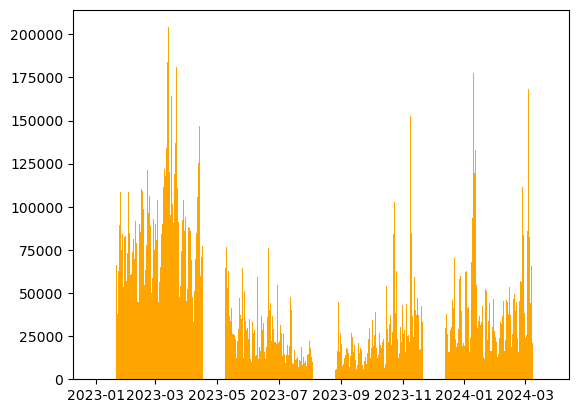

<Figure size 2000x900 with 0 Axes>

In [111]:
plt.bar(data['Open Time'],data['Volume'],color='orange')
plt.figure(figsize=(20,9))
plt.show()

In [112]:
import mplfinance as mpf

In [113]:
data.set_index('Close Time')

,Open Time,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
Close Time,,,,,,,,,,,
2023-01-01 23:59:59.999000064,2023-01-01,0.072299,0.072500,0.072110,0.072238,29425.9298,2127.639721,54865,15202.5874,1099.258275,0.0
2023-01-02 23:59:59.999000064,2023-01-02,0.072238,0.073018,0.072071,0.072814,50073.4163,3635.944413,84917,25144.3061,1826.191064,0.0
2023-01-03 23:59:59.999000064,2023-01-03,0.072814,0.072857,0.072449,0.072840,56344.9152,4096.759900,90775,28068.0079,2040.751746,0.0
2023-01-04 23:59:59.999000064,2023-01-04,0.072840,0.075069,0.072819,0.074581,99025.8395,7349.115476,158770,50938.9737,3778.908186,0.0
2023-01-05 23:59:59.999000064,2023-01-05,0.074581,0.074643,0.074082,0.074336,56893.2305,4230.433215,91532,27793.8631,2066.500561,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2024-03-18 23:59:59.999000064,2024-03-18,0.053290,0.053340,0.051800,0.052070,45858.7009,2408.695787,127454,19956.7982,1048.384552,0.0
2024-03-19 23:59:59.999000064,2024-03-19,0.052070,0.052310,0.050960,0.051000,89317.8395,4601.035090,251502,37495.1671,1933.004129,0.0
2024-03-20 23:59:59.999000064,2024-03-20,0.051010,0.052900,0.050210,0.051820,125378.0997,6453.416169,342707,56452.6309,2909.331810,0.0


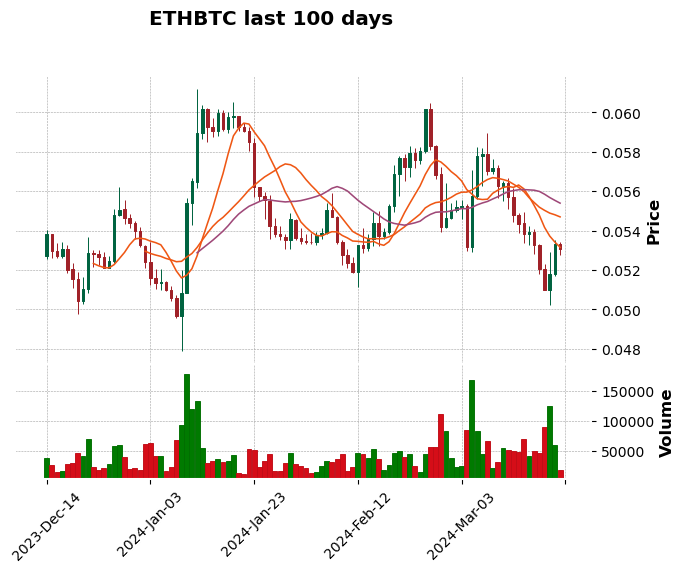

In [118]:
mpf.plot(data.set_index('Close Time').tail(100),type='candle',style='charles',volume=True,title='ETHBTC last 100 days',mav=(10,20,30))